# <center>PYTHON POUR L'ECONOMISTE : PROJET 2A</center>
<center><img src = "Images/logo_ensae.png"></center>

# <center>Thème : Analyse prédictive des cours des actions FAANG</center>

### <center>Réalisé par :</center> ###

<center> <b> ESSOH Lasme Ephrem Dominique </b></center>
<center> <b> ELAOUNI Fouzia </b></center>

### <center>Enseignante (TD) :</center> ###

<center> <b> MULLER Anne </b></center>

### <center> Année scolaire : 2020-2021</center> ###

 <center> Décembre 2020</center>

# Introduction

La propagation du Covid-19 dans le monde continue de susciter maintes inquiétudes. Outre les conséquences humaines tragiques de la pandémie, le Covid-19 engendre aussi des incertitudes sur les marchés financiers mondiaux. De ce fait, nous examinerons dans ce notebook les données du marché boursier, en particulier celles des firmes technologiques. Plus précisement, nous ménons une prédictive des cours des actions FAANG sur les douze derniers mois.

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) et Alphabet -- ou Google -- (GOOG). Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# Modules utilisés

## Chargement

Ci-dessous figure la liste complète des modules python utilisés dans ce notebook.

In [1]:
# pour les calculs numériques et scientifiques
import numpy as np
from scipy import stats

# pour la manipulation des données
import pandas as pd
from pandas_datareader.data import DataReader # ... pour récup. les datas sur yahoo finance

# pour les réprésentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# pour la gestion de dates
from datetime import datetime 

# pour le test statistique de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

# pour le preprocessing et l'apprentissage statistique
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# pour la gestion de certaines exceptions
import warnings
warnings.filterwarnings('ignore')

## Installations

Il sera possible d'installer tous les modules ou certains nécessaires pour ce notebook en cas d'absence. Il faudra alors supprimer le "#" devant une ligne de code afin d'installer le package manquant.

In [2]:
#!pip install numpy 
#!pip install scipy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas_datareader
#!pip install statsmodels
#!pip install tensorflow
#!pip install keras

# 1. Chargement et traitement des données

Nous utilisons le module <b>pandas_datareader</b>, chargé ci-dessus, afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG sur les douze derniers mois à compter de la date d'aujourd'hui sur votre ordinateur. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

<center><img src = "Images/yahoo_finance.png"></center>

## 1.1. Récupération des données

### 1.1.1. Récupération des séries temporelles des cours des actions pour chacune des 5 firmes étudiées

Nous construisons une fonction de récupération des données, via Yahoo Finance par Scrapping à travers DataReader, sur les cours de actions de FACEBOOK, APPLE, AMAZON, NETFLIX et GOOGLE. Ensuite, nous constituons des données de panel à partir de cette récupération. Les paramètres de notre fonction sont essentiellements la date de début et la date de fin pour lesquelles on souhaite disposer des données. Ainsi, l'on remarque que notre définition de ces dates permet d'obtenir automatiquement des données sur les douze derniers mois à compter de la date du jour auquel on execute ce notebook.

In [3]:
def recup_donnees(date_debut, date_fin) :
    
    global nom_firme
    
    # liste des firmes de la tech
    FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

    # date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
    fin = date_fin
    debut = date_debut
    
    # récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
    for stock in FAANG :   
        globals()[stock] = DataReader(stock, 'yahoo', debut, fin)
    
    # constitution de notre panel de données
    liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
    nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

    for firme, nom in zip(liste_firme, nom_firme):
        firme["Nom firme"] = nom
    
    data = pd.concat(liste_firme, axis = 0)
    
    return data

### 1.1.2. Affichage des données de panel

Ci-dessous figure le jeu de données sur les douze derniers mois à partir du jour d'aujourd'hui. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [4]:
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)
data = recup_donnees(debut, fin)

In [5]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
2019-12-18,204.300003,200.089996,200.089996,202.500000,23274400.0,202.500000,FACEBOOK
2019-12-19,206.300003,202.509995,202.779999,206.059998,16514600.0,206.059998,FACEBOOK
2019-12-20,207.710007,203.429993,207.479996,206.300003,27306900.0,206.300003,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE
2020-12-10,1781.310059,1740.319946,1769.800049,1775.329956,1362800.0,1775.329956,GOOGLE


Ci-dessous figure la liste des variables :

In [6]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Nom firme     object
dtype: object

Les six premières variables sont décrites dans les lignes qui suivent. La dernière variable fournit le nom de firme pour laquelle on dispose d'une donnée/observation à une date bien spécifique.

### 1.1.3 Deux exemples du format des données

Nous avons récupéré au total 5 séries temporelles (celles de FACEBOOK, de APPLE, de AMAZON, de NETFLIX et de GOOGLE) que nous avons rassemblées pour constituer un panel de données. Chaque séries temporelles contient 5 variables :

* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés (transactions) au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [7]:
#petite fonction d'affichage des données d'une seule firme
def donnees_firme(nom_firme):
    return data.loc[data["Nom firme"] == nom_firme]

In [8]:
donnees_firme("FACEBOOK").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-11-17,277.679993,273.290009,277.679993,275.000000,15040300.0,275.000000,FACEBOOK
2020-10-20,269.700012,262.880005,263.059998,267.559998,18763200.0,267.559998,FACEBOOK
2020-02-18,217.979996,213.399994,213.550003,217.800003,15609200.0,217.800003,FACEBOOK
2020-03-11,175.880005,167.660004,174.009995,170.240005,20373900.0,170.240005,FACEBOOK
2020-06-12,231.660004,224.500000,229.899994,228.580002,22071700.0,228.580002,FACEBOOK


In [9]:
donnees_firme("APPLE").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,114.841873,APPLE
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.965111,APPLE
2020-04-20,70.419998,69.212502,69.487503,69.232498,130015200.0,68.243881,APPLE
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,69.820442,APPLE
2020-06-10,88.692497,86.522499,86.974998,88.209999,41662900.0,87.899590,APPLE


# 2. Statistique descriptive et visualisation

## 2.1. Niveau moyen des cours et du volume des actions négociés en 2020

In [10]:
# agrégation des données des firmes pour l'année 2020
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2690.03,2614.64,2653.62,2653.50,4.995155e+06,2653.50
APPLE,94.88,92.15,93.49,93.57,1.467292e+08,93.04
FACEBOOK,236.04,228.87,232.41,232.64,2.272077e+07,232.64
GOOGLE,1486.06,1448.59,1466.07,1468.15,1.911222e+06,1468.15
NETFLIX,450.50,434.38,442.25,442.89,7.118422e+06,442.89


L'action AMAZON a le cours moyen plus élevé en 2020 contrairement à l'action APPLE. Cependant, l'action de APPLE est la plus négocié en 2020 contrairement à GOOGLE.

## 2.2. Evolution du cours des actions journalières

Cette évolution sera appréciée à l'aide du graphe de la valeur ajustée du cours de l'action. De fait, toute notre étude est menée sur cette grandeur. La raison pour laquelle nous n'utilisons pas <b>Close</b>, valeur de l'action à la fermerture du marché est que <a href = https://help.yahoo.com/kb/SLN28256.html> Yahoo Finance (Adj Close) </a>  recommande d'utiliser <b>Adj Close</b> car il s'agit d'une valeur ajustée de l'action à la fermerture du marché en prenent en compte les divendes reversées.

In [11]:
# création d'une fonction permettant de générer les graphes

def profil_temporel(var, dim_fig1, dim_fig2, subplot1, subplot2, pct = False):
    
    if pct == False:
        plt.figure(figsize=(dim_fig1, dim_fig2))
        plt.subplots_adjust(top=1.25, bottom=1.2)
        for i, nom in enumerate(nom_firme, 1):
            plt.subplot(subplot1, subplot2, i)
            firme = donnees_firme(nom)
            firme[var].plot()
            plt.ylabel(var)
            plt.xlabel(None)
            plt.title(nom)
    else:
        plt.figure(figsize=(dim_fig1, dim_fig2))
        plt.subplots_adjust(top=1.25, bottom=1.2)

        for i, nom in enumerate(nom_firme, 1):
            plt.subplot(subplot1, subplot2, i)
            firme = donnees_firme(nom)
            firme[var].pct_change().plot()
            plt.ylabel('Rendement')
            plt.xlabel(None)
            plt.title(nom)

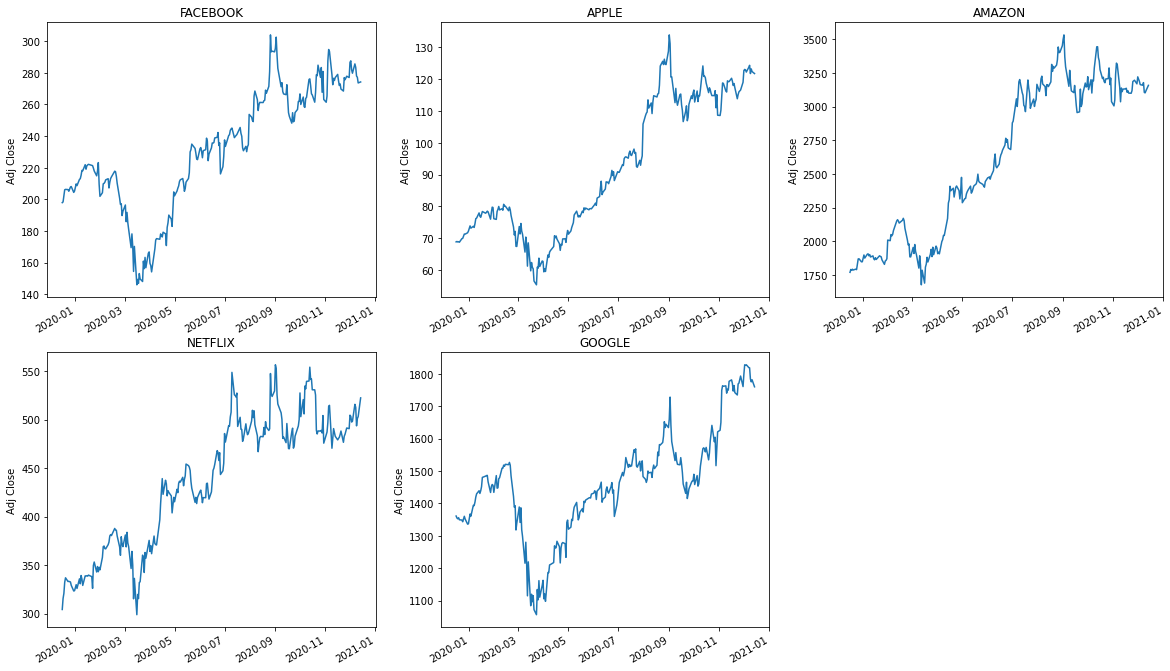

In [12]:
profil_temporel("Adj Close", 20, 8, 2, 3)

Dans, l'ensemble le cours des actions des différentes firmes de la tech. connait une tendance haussière avec des niveaux de hausse et de baisse sur les douze derniers mois. On remarque aussi une chute importante des cours des actions au mois de Mars à cause de la crise pandémique (Covid 19). Par ailleurs, on note très forte variabilité de ces cours.

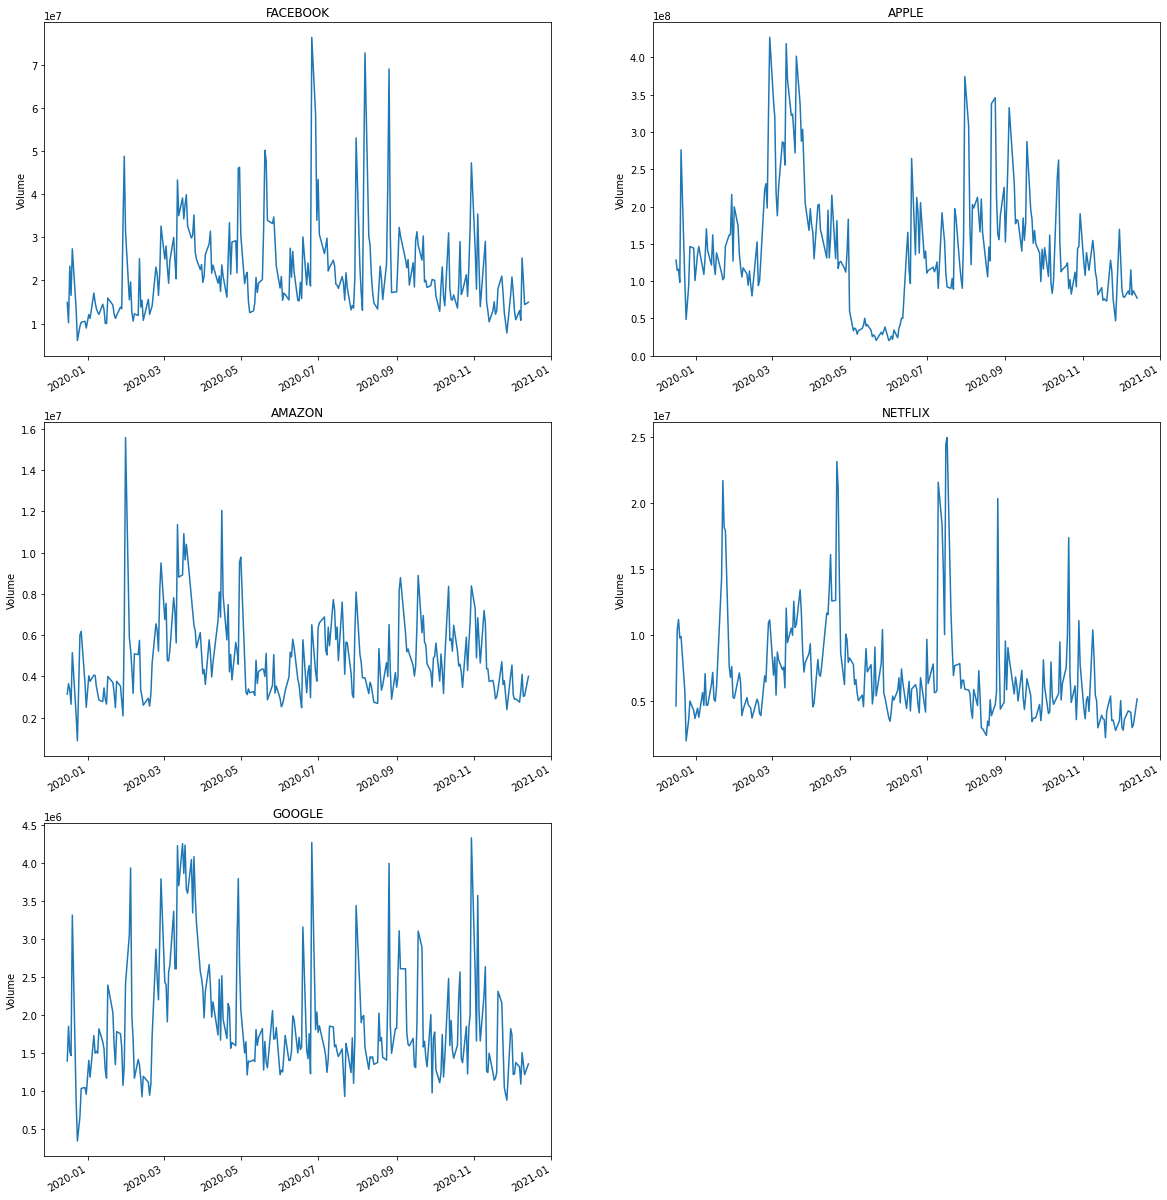

In [13]:
profil_temporel("Volume", 20, 15, 3, 2)

De même, on remarque que le volume des actions négociés fluctue fortement, il n'existe pas de tendance observable.

## 2.3. Le rendement

### 2.3.1. Cadre théorique 

La théorie de gestion de portefeuille s'appuie sur la notion du rendement qui mesure pendant un intervalle de temps donné l'appréciation ou la dépréciation relative de la valeur d'un actif donné ou d'un portefeuille d'actifs.

Soit $x_t$ le cours de l’action X au jour t, le rendement simple n'est autre que
 $r^*_t=\frac{x_t-x_{t-1}}{x_{t-1}}$.
 
On notera aussi le log-rendement comme suit : $r_t={\mathrm{log} (\ \frac{x_t}{x_{t-1}}\ )\ }={\mathrm{log} (r^*_t+1\ \ )\ }$.

Le développement limité  de $r_t$ au voisinage de 0 donne :

$r_t={\mathrm{log} (r^*_t+1\ \ )\ }$ $\approx$ $r^*_t$.




### 2.3.2. Visualisation des rendements

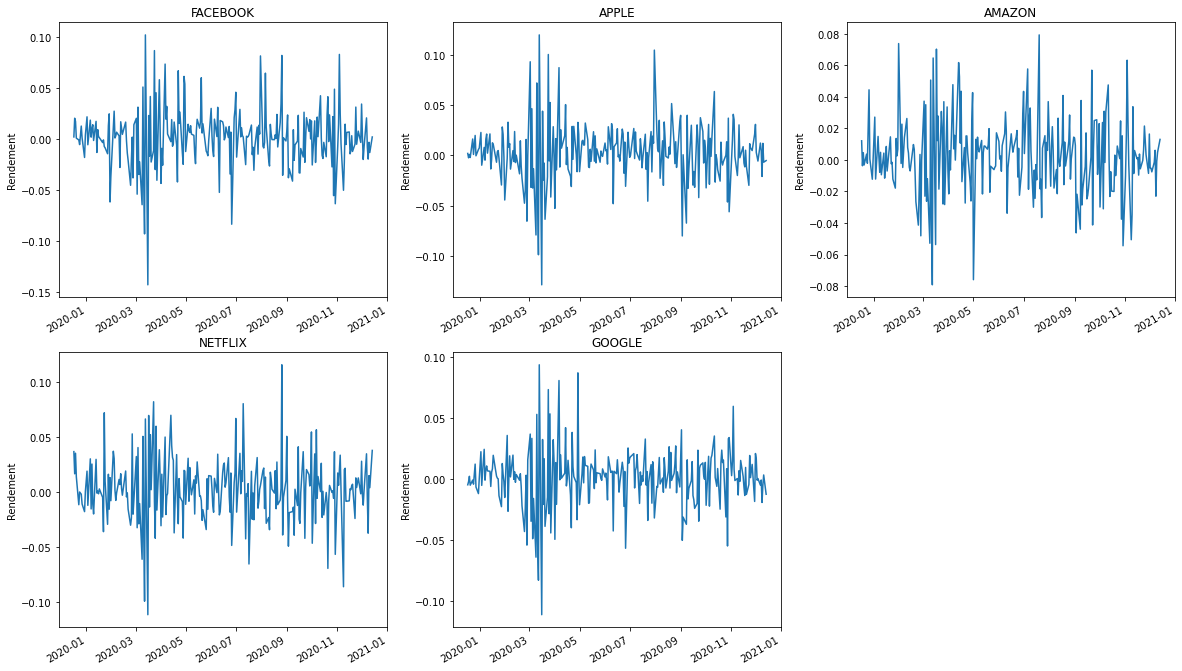

In [14]:
profil_temporel("Adj Close", 20, 8, 2, 3, True)

On remarque déjà l'absence de tendance dans la série rendement, avec grand choc au mois de mars à cause de la crise pandémique, ce qui était attendu !

### 2.3.3. Propriétés statistiques du processus des rendements

Passons à la vérification de quelques propriétés statistiques de la série des rendements.

#### a. Stationnarité

<b> Rappel </b> : 
Un processus $y_t$ est faiblement stationnaire si :

- $E(y_t)=\mu$ constante indépendante de $t$

- $Var(y_t)=\sigma^2 < \infty $

- $\gamma_t=cov(y_t,y_{t-h})$ ne dépend pas de $t$ mais de l'entier $h$

On tranchera sur la stationnarité de la série des rendements avec un test de Dickey-Fuller :

<b> Test de Dickey-Fuller </b>  :

Soit $\Delta y_t = y_t-y_{t-1}=\alpha+\beta t +\gamma y_{t-1}+e_t$.

$H_0$ : $\gamma=0 , y_t$ s'agira d'une marche aléatoire.

$H_1$ :  $-1<1+\gamma<1$, on affirmera que $y_t$ est stationnaire.


In [15]:
for i, nom in enumerate(nom_firme, 1):
    firme = donnees_firme(nom)
    d=adfuller(firme['Adj Close'].pct_change().dropna(), maxlag=None, regression='c', autolag='AIC', store=False, regresults=True)
    print("p-value  ", nom , "=====>" , d[1] )

p-value   FACEBOOK =====> 4.090236698741675e-05
p-value   APPLE =====> 3.4716270052006376e-05
p-value   AMAZON =====> 2.340012602347404e-30
p-value   NETFLIX =====> 0.0
p-value   GOOGLE =====> 0.0008341187224016992


Toutes les p-values sont inférieures à 5 % donc on rejette $H_0$, d'où les séries des rendements sont stationnaires.

#### b. Normalité

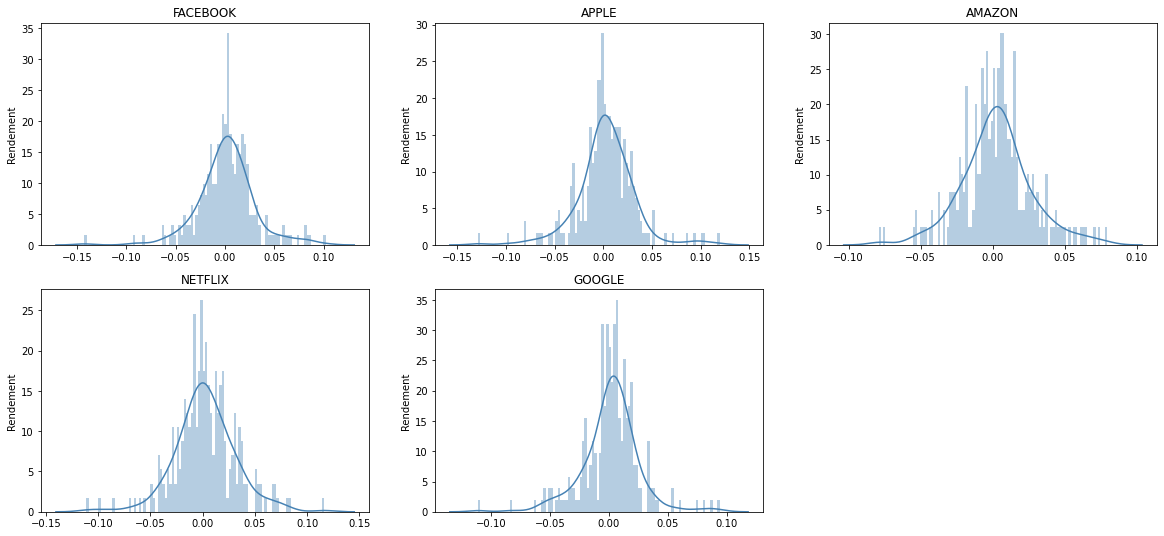

In [16]:
plt.figure(figsize=(20, 9))
for i, nom in enumerate(nom_firme, 1):
    plt.subplot(2, 3, i)
    firme = donnees_firme(nom)
    sns.distplot(firme['Adj Close'].pct_change().dropna(), bins=100, color='steelblue')
    plt.ylabel('Rendement')
    plt.xlabel(None)
    plt.title(nom)

Ces graphes montrent que les distributions de rendements des actions  ont des queues plus épaisses que les distributions normales comme mentionnées auparavant. Nous allons vérifier si les courbes de rendement des différentes actions représentent la distribution gaussienne par le test de <a href = "https://fr.wikipedia.org/wiki/Test_de_Jarque-Bera"><b>Jacque-Bera</b></a>.

#### Test de Jarque-Bera.

$H_0$ $:$ " la distiribution suit une loi normale "

La statistique de Jaque-Bera est: $JB=\frac{n}{6}$$(S^2+\frac{(k-3)^2}{4})$

Cette statistique suit une loi de $\chi^2$ de degré de libérté 2.
  
Avec :

-$n$ le nombre d'observations 

-$coef f d'assymétrie=S=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^3}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^{\frac{3}{2}}}$

-$coef f d'applatissement=k=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^4}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^2}$


   
Nous utilisons le module stats de scipy pour réaliser le test de Jarque-Bera.

In [17]:
for i, nom in enumerate(nom_firme, 1):
    firme = donnees_firme(nom)
    x = firme['Adj Close'].pct_change().dropna()
    print("JB ", nom, "=====>" ,stats.jarque_bera(x) )

JB  FACEBOOK =====> Jarque_beraResult(statistic=127.16977678505236, pvalue=0.0)
JB  APPLE =====> Jarque_beraResult(statistic=150.95838273357447, pvalue=0.0)
JB  AMAZON =====> Jarque_beraResult(statistic=14.513810049641117, pvalue=0.0007052875084926358)
JB  NETFLIX =====> Jarque_beraResult(statistic=43.11216826762664, pvalue=4.3482206724121397e-10)
JB  GOOGLE =====> Jarque_beraResult(statistic=141.49432216921767, pvalue=0.0)


On rejete $H_0$ pour les 5 actions puisque toutes les p-values sont  inférieures à 5 %. Les distributions des rendements ne sont donc pas normales.

## 2.4. Le risque

### 2.4.1.  Le cadre théorique

Le risque du marché d’un portefeuille provient des variations des cours des actifs financiers et de leur effet négatif sur la valeur financière totale du portefeuille. Traduit en terme de rendement, les rentabilités des actifs deviennent alors des variables aléatoires dont l’évolution future n’est pas, a priori, connue et quantifiable. Dans le cas des actions on distingue entre le risque systémique du marché et le risque spécifique de chaque action. 

Exemple : 

Risque systémique : La crise de covid-19

Risque spécifique : Liquidation de l’entreprise E

Dans son modèle de moyenne-variance.  <a href = "https://fr.wikipedia.org/wiki/Harry_Markowitz"> Markowitz </a> a utilisé la variance des rendements pour mesurer le risque car celle-ci présente des propriétés statistiques qui permettent d’expliciter la variance d’un portefeuille à partir des risques individuelles des actions qui le compose :

$${{\sigma }_{p\ }}^2~~=\sum_j{w_j\ {{\sigma }_{j\ }}^2}-2\sum_i{\sum_j{w_i\ w_j\ {\rho }_{i,j}\ {\sigma }_i}}$$

Avec:

- ${{\sigma }_{p\ }}^2~$: La variance des rendements moyens du portefeuille ( la volatilité)

- ${{\sigma }_{i\ }}^2~$: La variance des rendements moyens de l'action i ( la volatilité)

- $w_i$ : Le poids de chaque action dans le portefeuille 

- ${\rho }_{i,j}$ : La corrélation linéaire entre l'action i et j 

Le probléme de l'investisseur c'est de choisir les poids qui minimisent ce risque (i.e. $\sigma_p$) sous contrainte d'une rentabilité donnée.
 
\begin{array}{c}
{\mathrm{min\ \ \ \ \ } \ \ \ \ \ \ {\sigma }_{p\ }\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ } \\ \ \ \ \ \
sc.\ \ \ \ \ \ \ \ \ \ \ \ \ \ W^T\ R=R_p\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \\ 
\ \  W^T\ \mathrm{l}=1\ \ \ \ \ \ \  \end{array}



Avec $R$ le vecteur des rendements moyens (rentabilité) et $W$ le vecteur des poids.

### 2.4.2. Corrélation des actions 2 à 2

In [18]:
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)
Matcours = DataReader(FAANG, 'yahoo', debut, fin)['Adj Close']
Matrend = Matcours.pct_change()
Matrend.tail()

Symbols,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2020-12-08,-0.007634,0.005091,0.006108,-0.006049,-0.000511
2020-12-09,-0.019337,-0.020904,-0.023004,-0.037179,-0.018927
2020-12-10,-0.002879,0.011989,-0.000873,0.015174,-0.004932
2020-12-11,-0.012883,-0.006735,0.004814,0.004251,0.003628
2020-12-14,0.002340,-0.005147,0.013012,0.038154,-0.012184


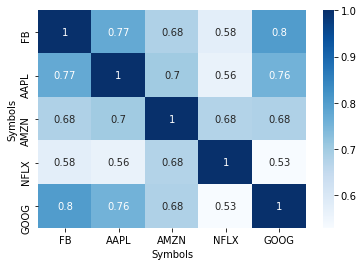

In [19]:
Matrend.corr()
sns.heatmap(Matrend.corr(), annot=True, cmap='Blues')
plt.show()

Plus les corrélations entre les variables sont proches de 1 moins il est intéressant pour les investissuers de diversifier leurs portefeuilles.

La forte corrélation entre les différentes actions était prévisible puisque en 2020 les 5 actions de FAANG ont subit presque les mêmes chocs à cause des conséquences de la crise pandémique.

### 2.4.3. Le risque et la rentabilité

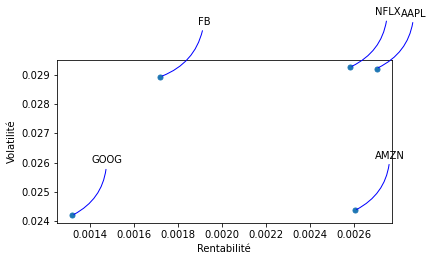

In [20]:
# On classe ces 5 actions en tremes de volatilité (le risque)
# Suppression des valeurs manquantes
Matrendvola = Matrend.dropna()
# Création de la figure 
area = np.pi*20
plt.figure(figsize=(6, 3))

plt.scatter(Matrendvola.mean(),Matrendvola.std(),s=25)

plt.xlabel('Rentabilité')
plt.ylabel('Volatilité')

for label,x,y in zip(Matrendvola.columns,Matrendvola.mean(),Matrendvola.std()):
   plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


D'après ce graphe on remarque que google était l'actif le moins risqué et le moins rentable contrairement à Apple. 
Par ailleurs, Google et Amazon partagent le même risque ; De même, pour Facebook, Netflix et Apple. 

# 3. Modélisation

Nous souhaitons prédire le cours ajustées des actions des FAANG  à la fermeture du marché boursier. Différents types de modèles possibles peuvent être employés : des modéles de séries temporelles linéaires de type ARIMA, ARCH, GARCH, ... ou encore des modèles d'apprentissage statistique de type réseau de neurones. Nous employons ici un modéle de prédiction du deuxième type, plus précisement nous mettons en place un modèle de réseau de neurones récurrents (RNN) afin de modéliser le cours des actions des FAANG. L'idée est de réproduire autant que possible la variabilité à haute fréquence du cours de ces actions. Ainsi, un modèle d'apprentissage de réconnaissance de séquences (ici nos données temporelles) pourrait être préférable. De ce fait, nous développons dans la classe des RNN, un réseau Long short-term memory (LSTM) <a href = "http://cs230.stanford.edu/projects_winter_2020/reports/32066186.pdf">(Cet article de Stanford University, motive sur la pertinence de la classe des modèles LSTM pour la modélisation des cours financiers)</a>. Notons que notre objectif n'est pas de comparer diverses classes de modèles, mais plutôt de proposer un modèle qui réprésente au mieux les données avec de bonnes performances de généralisation.  

### 3.1. Qu'est-ce-que le LSTM ?

##### Le Deep Learning

Le Deep Learning (DL) est le sous-domaine du Machine Learning (ML) qui traite de la construction, de l'architecture et l'implémentation de modèles prédictifs basés sur des réseaux de neuronnes artificiels. 

##### Les réseaux de neurones artificiels, piliers du Deep Learning

Pour la résolution de ses problèmes, le DL fait appel aux réseaux de neurones artificiels. Les réseaux de neurones artificiels, formalisme mathématique des réseaux de neurones bilogiques, utilisent des entrées $\vec{X}$ qu'ils transforment, à l'aide réprésentation non linéaire, en sorties $\vec{y}$ via une architecture bien spécifique.

#####  L'architecture feed-forward

Il s'agit d'un réseau de neurones dans lequel il existe trois niveaux de réprésentation des données : la couche d'entrée, les couches cachées et la couche de sortie. La couche d'entrée est celle qui contient les prédicteurs ou features ou variables d'entrées. Ces features sont ensuite combinées linéairement puis transformées via une fonction non linéaire, dite d'activation, afin d'être connectées aux neurones d'une couche cachée. Le même principe est alors repété d'une couche cachée à une autre tant que l'on souhaite produire autant que possible de la non linéairité dans nos transformations. Enfin, le résultat de la dernière couche cachée est achéminé vers une couche de sortie, toujours par le bias de combinaison lineaire + d'une fonction d'activation, afin de produire une prédiction. 

<center><img src = "Images/img_rna.png"></center>


Le challenge du modélisateur est de trouver le nombre de couche cachées adéquat pour l'apprentissage d'un tel réseau de neurones : il faudra éviter autant que possible le surapprentissage.

On peut par exemple utiliser un réseau de neurones feed-forward afin de prédire le label d'un target cible pour lequel on dispose d'un jeu de données d'entrainement annotés : <a href = "https://nextjournal.com/gkoehler/digit-recognition-with-keras"> L'exemple du MNIST</a>.

En réalité, les réseaux de neurones feed-forward conviennent pour le traitement de problématique où le jeu de données d'entrainement est constitué d'observations indépendantes les unes des autres. Que faire alors si ces observations sont séquentielles (séquences de mots) ou temporelles (nos séries temporelles du cours des actions par exemple) ? 

Il faut alors utiliser une autre architecture de réseaux de neurones. Bien souvent, on utilise la classe des réseaux de neurones dits récurrents.

##### L'architecture recurrent neural network

Les réseaux de neurones récurrents permettent modéliser des données séquentielles (et donc des séries temporelles). Dans ces réseaux la sortie d'un neurone d'une couche cachée, au lieu d'être directement transmise à couche suivante, peut être sauvegardée par le neurone afin de produire des dépendances entre ses sorties nouvelles et ses sorties passées : les neurones d'une couche cachée réalisent une sorte de boucle (récurrence) sur elles-mêmes afin de prendre en compte l'information passée. Ainsi ces neurones, contenant un mécanisme de sauvegarde, sont assimilables à des cellules mémoires. Et une cellule suivant le type de réseau de neurones récurrent possède elle-même une artitecture différente.

<center><img src = "Images/img_rnn.png"></center>

##### L'architecture LSTM

Le figure que nous présentons ci-dessous est extraite de <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> l'article</a> de Christopher Olah, lequel article que nous pensons décrire au mieux et simplement la logique derrière le réseau de neurone LSTM. Au risque de recopier cet article, nous invitons le lecteur cliquer <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> sur le lien hypertexte</a>.

<center><img src = "Images/img_lstm.png"></center>

### 3.2. Implémentation de notre LSTM

Nous réalisons une implémentaiton d'un modèle LSTM plus précisement un Stacked LSTM ou LSTM empilé <a href = "https://machinelearningmastery.com/stacked-long-short-term-memory-networks/#:~:text=A%20Stacked%20LSTM%20architecture%20can,for%20all%20input%20time%20steps.">(Stacked LSTM)</a> qui est une architecture de réseau de neurones qui combine cellules LSTM et couches cachées. Notre architecture de réseau de neurones est telle qu'elle comprend 2 LSTM empilés, 2 couches cachées et 1 couche de sortie. 

Notre modèle est implémenté avec le module Keras.

Mais avant d'entrainer notre réseau de neurones, nous réalisons un preprocessing des données :

* Tout d'abord, on augmente la longueur des données de sorte à avoir beaucoup de données d'apprentissage (nous avons choisis la période Janvier 2012 à aujourd'hui lors de l'entrainement du modèle) ;


* Ensuite, nous normalisons les données par opération de centrage-réduction ;


* Nous divisons le jeu de données en Training Set et Testing Set. Puisque nos données sont temporelles on a pris les <b>80% multiplié par la taille des données</b> premières observations. Les dernières ont servi de jeu de test. 


* Nous avons converti les données en matrice numpy et nous les avons redimensionnées afin d'obtenir des features (x_train, x_test) et un target (y_train, y_test) à partir du Training Set et du Testing Set.


* Nous entrainons notre modèle sur notre Training Set puis nous l'évaluons sur Testing Set.


* Enfin, nous visualisons les résultats grâce à un graphique de synthèse.

Nous avons rassemblé toutes ces opérations dans une fonction nommée LSTM_FAANG dont les paramètres sont le nom d'une firme faisant partir des FAANG, la pédiode de temps sur laquelle on souhaite entrainer et tester notre modèle : date de début et date de fin.

In [21]:
def LSTM_FAANG(nom_firme, longeur_apprentissage_1, longeur_apprentissage_2 ) :
    
################### DONNEES + FEATURE PREPROCESSING ###########################################################################
    
    nom_de_la_firme = nom_firme

    #récupération de beaucoup de données de t'entrainement
    debut = longeur_apprentissage_1
    fin = longeur_apprentissage_2
    data = recup_donnees(debut, fin)
    df = data.loc[data["Nom firme"] == nom_firme].iloc[:,:6]



    #extraction du target et conversion en matrice de valeurs numpy
    dataset = df.filter(['Adj Close']).values


    #normalisation des données
    scaler = StandardScaler()
    dataset_normalisee = scaler.fit_transform(dataset)




    #création jeu d'entrainement

    #obtention du nombre de ligne du jeu d'entrainement
    longueur_training_data = int(np.ceil( len(dataset) * .8 ))

    #création du jeu d'entrainement à partir des données normalisées
    train_data = dataset_normalisee[0:int(longueur_training_data), :]

    #séparation en (x_train, y_train) du jeu d'entrainement
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    #passage en matrice de valeurs numpy 
    x_train, y_train = np.array(x_train), np.array(y_train)

    #reshape des données pour l'apprentissage
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))




    #création jeu de test

    #création du jeu d'entrainement à partir des données normalisées
    test_data = dataset_normalisee[longueur_training_data - 60: , :]

    #séparation en (x_test, y_test) du jeu d'entrainement
    x_test = []
    y_test = dataset[longueur_training_data:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    #passage en matrice de valeurs numpy
    x_test = np.array(x_test)

    #reshape des données pour l'apprentissage
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    
    print("*** Le preprocessing des données de ", nom_firme, " a bien été éffectué !")    
    

    
################### CONSTRUCTION ET ENTRAINEMENT DU MODELE LSTM #############################################################

    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(100, return_sequences= False))
    model.add(Dense(25))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    print("*** L'entrainement du modèle LSTM a bien été éffectué sur les données de", nom_firme)

    

    
################### EVALUATION DU MODELE #############################################################

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

    print("*** L'erreur quadratique moyenne (racine carrée) est de : ", rmse, " sur le jeu de données de", nom_firme)

    

    
################### VISUALISATION DU MODELE #############################################################

    dat = df.filter(['Adj Close'])
    train = dat[:longueur_training_data]
    valid = dat[longueur_training_data:]
    valid['Predictions'] = predictions
    print("*** Visualisation des résultats :")
    plt.figure(figsize=(10,6))
    plt.title(nom_de_la_firme)
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Adj close ($)', fontsize=13)
    plt.plot(train['Adj Close'])
    plt.plot(valid[['Adj Close', 'Predictions']])
    plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
    plt.show()
    
    
    print("************************************************************************************")

### 3.3. Résultats LSTM

Entrainons à présent notre modèle pour l'ensemble des actions FAANG.

*** Le preprocessing des données de  FACEBOOK  a bien été éffectué !
1667/1667 [==============================] - 22s 13ms/step - loss: 0.0102
*** L'entrainement du modèle LSTM a bien été éffectué sur les données de FACEBOOK
*** L'erreur quadratique moyenne (racine carrée) est de :  9.193763650239909  sur le jeu de données de FACEBOOK
*** Visualisation des résultats :


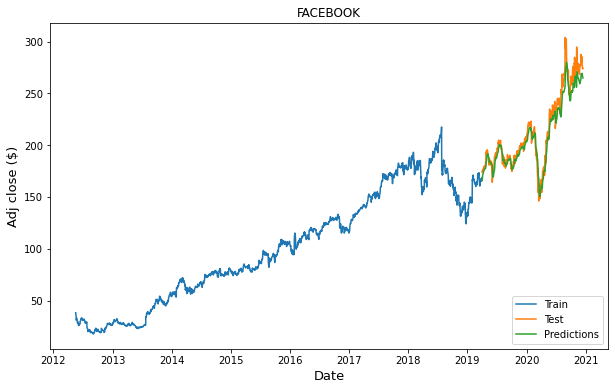

************************************************************************************
*** Le preprocessing des données de  APPLE  a bien été éffectué !
1743/1743 [==============================] - 23s 13ms/step - loss: 0.0037
*** L'entrainement du modèle LSTM a bien été éffectué sur les données de APPLE
*** L'erreur quadratique moyenne (racine carrée) est de :  12.367571489612274  sur le jeu de données de APPLE
*** Visualisation des résultats :


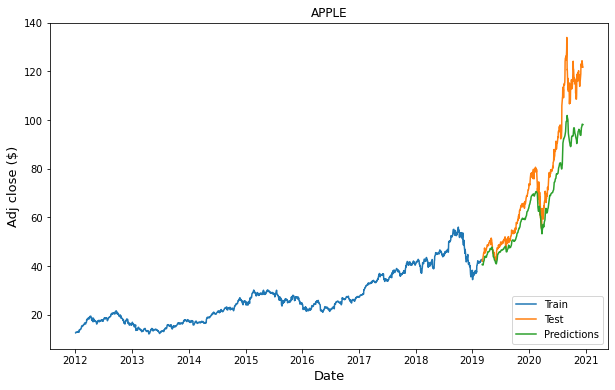

************************************************************************************
*** Le preprocessing des données de  AMAZON  a bien été éffectué !
1743/1743 [==============================] - 23s 13ms/step - loss: 0.0046
*** L'entrainement du modèle LSTM a bien été éffectué sur les données de AMAZON
*** L'erreur quadratique moyenne (racine carrée) est de :  209.19558589788272  sur le jeu de données de AMAZON
*** Visualisation des résultats :


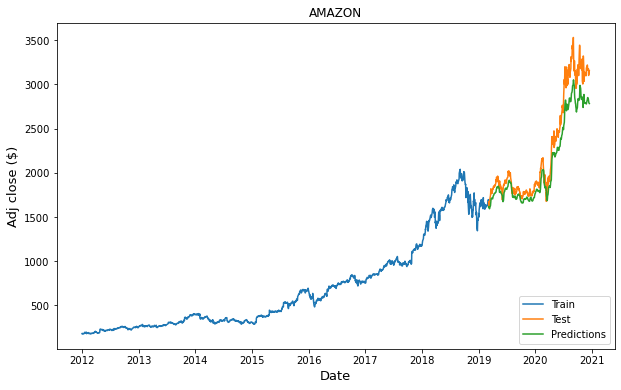

************************************************************************************
*** Le preprocessing des données de  NETFLIX  a bien été éffectué !
1743/1743 [==============================] - 23s 13ms/step - loss: 0.0092
*** L'entrainement du modèle LSTM a bien été éffectué sur les données de NETFLIX
*** L'erreur quadratique moyenne (racine carrée) est de :  22.859304248200498  sur le jeu de données de NETFLIX
*** Visualisation des résultats :


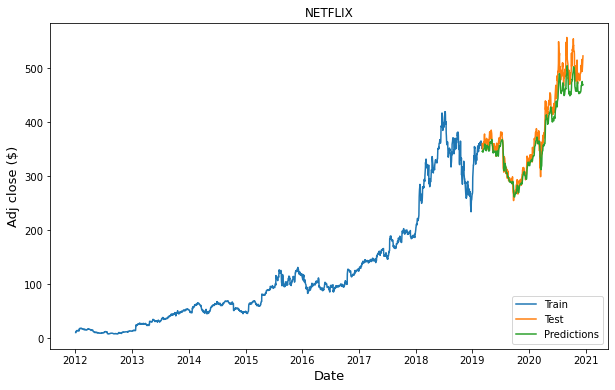

************************************************************************************
*** Le preprocessing des données de  GOOGLE  a bien été éffectué !
1743/1743 [==============================] - 22s 13ms/step - loss: 0.0067
*** L'entrainement du modèle LSTM a bien été éffectué sur les données de GOOGLE
*** L'erreur quadratique moyenne (racine carrée) est de :  84.24190224777281  sur le jeu de données de GOOGLE
*** Visualisation des résultats :


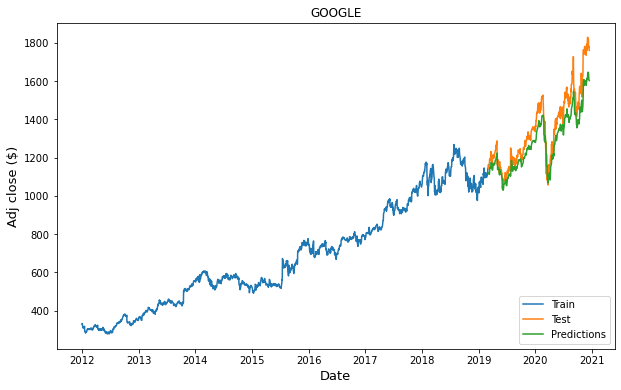

************************************************************************************


In [22]:
for firme in nom_firme :
    LSTM_FAANG(firme, "2012-01-01", datetime.now())

Disposant d'une taille de données d'apprentissage de taille relativement confortante, les résultats de notre modélisation permettent de conclure que le modèle LSTM que nous implémentons arrive a réproduire plûtot bien le comportement du cours des actions. Il a arrive à reconnaitre les séquences passées afin de proposer des prédictions relativement proche de la réalité. 

# Conclusion

Pour conclure :

* <i><b>Nous avons étudié l'évolution du cours des actions de cinq grande firmes de la tech</b></i> : Il résort que les cours des actions, généralement à tendance haussière, ont tous subit un choc important au mois de Mars 2020 dû à la crise du Covid 2019.


* <i><b>Nous avons étudié la rentabilité des actions de ces firmes</b></i> : Nous obtenons que GOOG (Google) était l'actif le moins risqué et le moins rentable contrairement à AAPL (Apple). Les actifs GOOG (Google) et AMZN (Amazon) ont le même risque. De même, pour les actifs FB (Facebook), NTFLX (Netflix) et AAPL (Apple). 


* <i><b>Nous avons modélisé le cours des actions de ces firmes</b></i> : Nous concluons que la modélisation par apprenitssage statistique (modèle LSTM), moyennant des données d'entrainement de taille importante, peut réproduire avec une bonne précision le comportement évolutif du cours des actions pour des besoins de prédiction. 